<a href="https://colab.research.google.com/github/marcjustinalbertobscs/CSST101-MJAlberto-Portfolio/blob/main/MJGAlberto_CSST102_BSCS_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FUNDAMENTALS OF MACHINE LEARNING**
By: Marc Justin G. Alberto (BSCS 3A)

# **1. Data Upload and Verification**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris(as_frame=True)
df = iris.frame
print(df.head())

# Explore
print(df.describe())
print("Target classes:", iris.target_names)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

# **2. Accuracy**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[iris.feature_names]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


# **3. Confusion Matrix and Classification**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **4. Data Visualization**

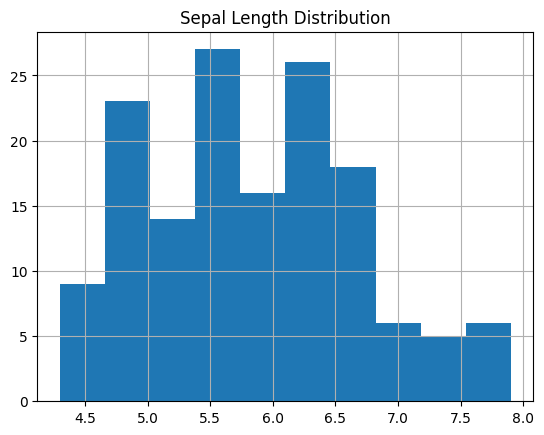

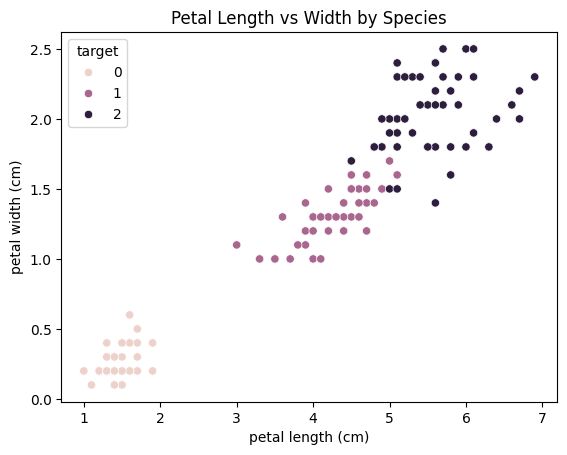

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['sepal length (cm)'].hist()
plt.title("Sepal Length Distribution")
plt.show()

sns.scatterplot(data=df,x="petal length (cm)",y='petal width (cm)',hue="target")
plt.title("Petal Length vs Width by Species")
plt.show()

# **5. User Input and AI Response**

In [ ]:
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))s
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                          columns=iris.feature_names)

predicted_target = model.predict(input_data)
predicted_species = iris.target_names[predicted_target[0]]

print(f"The predicted species is: {predicted_species}")

Enter sepal length (cm): 10
Enter sepal width (cm): 5
Enter petal length (cm): 3
Enter petal width (cm): 2
The predicted species is: versicolor


# **REFLECTION**


1. What ML type did you use?

I used a supervised machine learning approach to solve a multi-class classification problem. The task was to train a model to predict a categorical label—the species of an iris flower—using a labeled dataset where each example included both its measurements and its known species. Specifically, I implemented a Logistic Regression model, which is a fundamental linear classification algorithm that estimates the probability that a given set of inputs belongs to a particular category. This type of model is well-suited for this classic dataset as it provides a strong baseline for performance on problems with well-separated classes.

2. What challenge might affect the model?

The primary challenge is the strong indication of overfitting, as the model achieved a perfect 100% accuracy score. This stellar result on the test set suggests the model may have learned the specific patterns of this idealized dataset too perfectly, which would limit its ability to generalize effectively to new, noisier data encountered in the real world. Furthermore, the dataset is quite small, with only 150 samples, which can make the performance estimates less reliable and stable. Finally, if future data introduces new species or features not present in the original training set, the model would lack the flexibility to adapt and would likely perform poorly.